# Introduction: Data Types and Panda's DataFrame

$\textbf{by Ahmed Pirzada, University of Bristol}$

$\textbf{aj.pirzada@bristol.ac.uk}$

$\textbf{27th October 2025}$

## Learning Objectives

- Understand Python basic data types (string, int, list, dict) and printing/f-strings.
- Build a Pandas DataFrame from Python objects and manage indexes.
- Explore data with head/describe, select rows/columns, and compute summary stats.
- Filter rows with `DataFrame.query` using conditions and formulas.
- Group and aggregate data with `groupby`, `agg`, and `reset_index`.
- Create new columns using vectorised operations (means, row-wise max).
- Plot bar, and scatter charts with labels and titles using Matplotlib.

## 1. Types of data

What you will do in this section:
- Create and inspect strings and integers using `type()`.
- Build a dictionary and a list, and access elements.
- Practice printing and basic string formatting with f-strings.

In [210]:
# Define a string variable for the student name.
name = 'Adam'

In [211]:
# Check the data type of the variable.
type(name)

str

In [212]:
# Print the value of the variable.
print(name)

Adam


In [213]:
# Use an f-string to format a message with variables.
print(f'Hello, {name}!')

Hello, Adam!


In [214]:
# Define an integer variable for age.
age = 20

In [215]:
# Check the data type (should be int).
type(age)

int

$\textbf{To-do:}$ Use f' to print: {name} is {age} years old

In [216]:
# Print: {name} is {age} years old
print(f'{name} is {age} years old')

Adam is 20 years old


------   

In [217]:
# Create a dictionary mapping keys (name, age) to values.
dict_student = {'name': name, 'age': age}


In [218]:
# Print the dictionary.
print(dict_student)

{'name': 'Adam', 'age': 20}


$\textbf{To-do:}$ Create a dictionary for your group with information on name, gender, distance, happiness, wentout

In [219]:
# Create list of names of students in the group.
names = ['Herb', 'Jennifer', 'Layla']
age = [20, 20, 21]

In [220]:
# List for gender - keep the same order as for names list.
genders = ['male', 'female', 'female']

In [221]:
# List for distance from your accommodation to university (in km).
dist = [0.8, 2, 0.7]

In [222]:
# List for happiness level (0-10).
hap = [10, 6, 5 ]

In [223]:
# List for number of times went out last week.
going_out = [3, 3, 2]

In [224]:
print(names, age, genders, dist, hap, going_out)

['Herb', 'Jennifer', 'Layla'] [20, 20, 21] ['male', 'female', 'female'] [0.8, 2, 0.7] [10, 6, 5] [3, 3, 2]


In [225]:
# Create a dictionary for your group with information on name, gender, distance, happiness, wentout
dict_group = {
    'Names': names,
    'Ages': age,
    'Gender': genders,
    'Distance from Uni': dist,
    'Happiness': hap,
    'Times Gone Out': going_out,

    }

In [226]:
# Print the dictionary.
print(dict_group)

{'Names': ['Herb', 'Jennifer', 'Layla'], 'Ages': [20, 20, 21], 'Gender': ['male', 'female', 'female'], 'Distance from Uni': [0.8, 2, 0.7], 'Happiness': [10, 6, 5], 'Times Gone Out': [3, 3, 2]}


---


## 2. DataFrame: Python version of Excel spreadsheet

In this section you will:
- Import Pandas and create a DataFrame from your dictionary.
- Remove duplicates and drop missing values

In [227]:
# Import the Pandas library for tabular data.
import pandas as pd

$\textbf{To-do:}$ Convert Dictionary to DataFrame

In [228]:
# Create a DataFrame (table) from the dictionary.
df_group = pd.DataFrame(dict_group)

In [229]:
# Display the first few rows of the final DataFrame.
df_group

,Names,Ages,Gender,Distance from Uni,Happiness,Times Gone Out
0,Herb,20,male,0.8,10,3
1,Jennifer,20,female,2.0,6,3
2,Layla,21,female,0.7,5,2


---

In [230]:
# Remove duplicate rows from the DataFrame.
df_group = df_group.drop_duplicates()

In [231]:
# Remove missing observations from the DataFrame.
df_group = df_group.dropna()

In [232]:
df_group

,Names,Ages,Gender,Distance from Uni,Happiness,Times Gone Out
0,Herb,20,male,0.8,10,3
1,Jennifer,20,female,2.0,6,3
2,Layla,21,female,0.7,5,2


## 3. Learn about the dataset

Next steps:
- Preview data with `head()` and compute `describe()`.
- Select specific rows (e.g., loc['Beth']) and columns.
- Calculate means and check correlations.

In [233]:
# Preview the first few rows of the DataFrame.
df_group.head() 

,Names,Ages,Gender,Distance from Uni,Happiness,Times Gone Out
0,Herb,20,male,0.8,10,3
1,Jennifer,20,female,2.0,6,3
2,Layla,21,female,0.7,5,2


In [234]:
# Summary statistics for numeric columns.
df_group.describe()

,Ages,Distance from Uni,Happiness,Times Gone Out
count,3.000000,3.000000,3.000000,3.000000
mean,20.333333,1.166667,7.000000,2.666667
std,0.577350,0.723418,2.645751,0.577350
min,20.000000,0.700000,5.000000,2.000000
25%,20.000000,0.750000,5.500000,2.500000
50%,20.000000,0.800000,6.000000,3.000000
75%,20.500000,1.400000,8.000000,3.000000
max,21.000000,2.000000,10.000000,3.000000


In [235]:
# Set the name column as the row index for easy lookups.
df_group = df_group.set_index('Names')
df_group.head()

,Ages,Gender,Distance from Uni,Happiness,Times Gone Out
Names,,,,,
Herb,20,male,0.8,10,3
Jennifer,20,female,2.0,6,3
Layla,21,female,0.7,5,2


$\textbf{To-do:}$ Learn about the dataset you created

In [236]:
# Select a row by label using .loc and the name.
df_group.loc['Herb']

Ages                   20
Gender               male
Distance from Uni     0.8
Happiness              10
Times Gone Out          3
Name: Herb, dtype: object

In [237]:
# Select multiple columns from the DataFrame.
df_group[['Ages', 'Happiness']]

,Ages,Happiness
Names,,
Herb,20,10
Jennifer,20,6
Layla,21,5


In [238]:
# Compute means of selected numeric columns.
df_group[['Ages', 'Happiness']].mean()

Ages         20.333333
Happiness     7.000000
dtype: float64

In [239]:
# Compute correlation between numeric columns.
df_group[['Distance from Uni', 'Happiness']].corr()

,Distance from Uni,Happiness
Distance from Uni,1.000000,-0.261235
Happiness,-0.261235,1.000000


---

## 4. Query dataset

You will filter rows using:
- Simple conditions (e.g., math < 60).
- Combined conditions with `and`/`or`.
- Formula-based filters, e.g., average mark thresholds.
- Create a new DataFrame.

$\textbf{To-do:}$ Use 'query' method to learn about your dataset

In [240]:
# Filter rows where Math is below a threshold.
df_group.query('Ages < 21')

,Ages,Gender,Distance from Uni,Happiness,Times Gone Out
Names,,,,,
Herb,20,male,0.8,10,3
Jennifer,20,female,2.0,6,3


In [243]:
# Filter rows with multiple conditions using 'and'
df_group.query('Ages < 21 and Happiness < 10')

,Ages,Gender,Distance from Uni,Happiness,Times Gone Out
Names,,,,,
Jennifer,20,female,2.0,6,3


In [244]:
# Filter rows with multiple conditions using 'or'
df_group.query('Ages < 21 or Happiness < 10')

,Ages,Gender,Distance from Uni,Happiness,Times Gone Out
Names,,,,,
Herb,20,male,0.8,10,3
Jennifer,20,female,2.0,6,3
Layla,21,female,0.7,5,2


In [ ]:
# Filter using a formula
df_group.query('Ages*Happiness > 120')

,Ages,Gender,Distance from Uni,Happiness,Times Gone Out
Names,,,,,
Herb,20,male,0.8,10,3


In [251]:
# Create a new DataFrame with filtered results.
df_new = df_group.query('Ages*Happiness > 120')

In [252]:
# Display the first few rows of the new DataFrame.
df_new.head()

,Ages,Gender,Distance from Uni,Happiness,Times Gone Out
Names,,,,,
Herb,20,male,0.8,10,3


---

## 5. By groups

Goal here:
- Use groupby('gender') to compute statistics.
- Select a single column before aggregating (e.g., ['econ']).

$\textbf{To-do:}$ Use 'groupby' method to learn about your dataset

In [ ]:
# Group by gender and compute mean for each group.
df_group.groupby('Gender')['a

KeyError: 'Column not found: False'

In [ ]:
# Group by gender and compute mean for one variable only.
df_group.groupby('Gender').mean('')

NameError: name 'male' is not defined

In [ ]:
# Group by gender and compute multiple statistics for one variable only.


---

## 6. Creating new variables

What you will create:
- A mean mark using column arithmetic.
- A max mark using row-wise max(axis=1).

$\textbf{To-do:}$ Create new variables

In [ ]:
# Add a new variable to the DataFrame as a function of existing variables.

In [ ]:
# Check what the updated DataFrame looks like.


In [ ]:
# Create a dummy variable for gender.


In [ ]:
# Check what the updated DataFrame looks like.


---

## 7. Visualisation

Plot essentials:
- Bar chart to compare marks.
- Box plot to view distributions.
- Scatter plot for relationships; add titles and axis labels.

In [263]:
# Import Matplotlib for plotting.
import matplotlib.pyplot as plt

$\textbf{To-do:}$ Plot a bar chart and a scatter plot

Text(0.5, 1.0, 'Ages and Happiness of my group ')

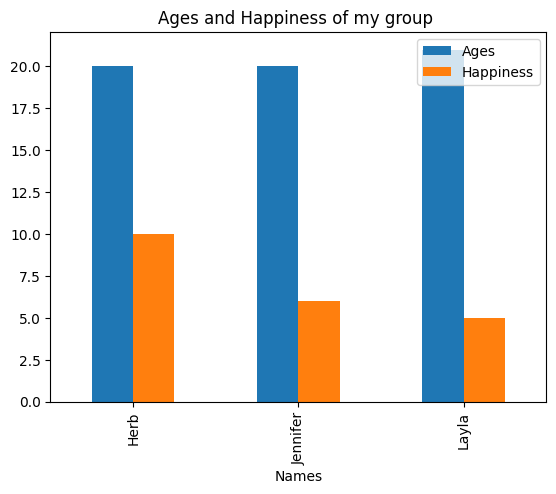

In [265]:
# Select a column from the DataFrame and plot a bar chart.
df_group[['Ages', 'Happiness']].plot(kind='bar')
plt.title('Ages and Happiness of my group ')

Text(0.5, 1.0, 'Ages and Happiness of my group ')

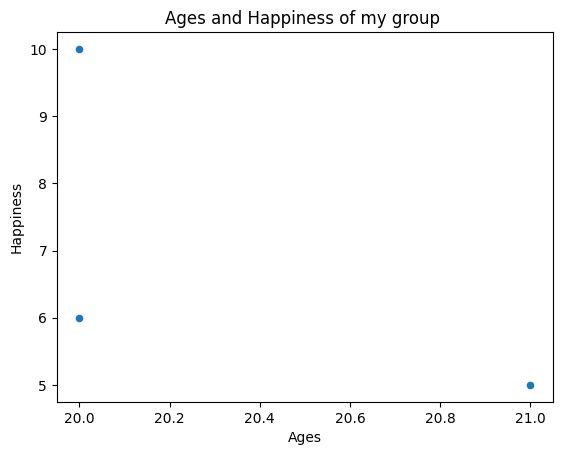

In [275]:
# Scatter plot to inspect relationship between two of the variables.
df_group.plot(kind='scatter', x = "Ages", y = 'Happiness')
plt.title('Ages and Happiness of my group ')

---

# Student Notes: Code Explanations

Use this summary to understand what each part of the notebook is doing and why. Run a cell with Shift+Enter and read the output before moving on.

1) Basic data types
- Strings: text in quotes, e.g. `name = 'Adam'`. Use `print(name)` or f-strings like `print(f'Hello, {name}!')` to format text.
- Integers: whole numbers, e.g. `age = 20`. `type(x)` shows the data type.
- Dictionaries: keyÃ¢â‚¬â€œvalue mapping, e.g. `{'name': 'Adam', 'age': 20}`. Access with `dict_student['age']`.
- Lists: ordered collections, e.g. `['Adam','Beth','Charlie']`. Lists become DataFrame columns later.

2) Building a DataFrame (Excel-like table)
- `import pandas as pd` loads the Pandas library used for data work.
- `pd.DataFrame(dict_students)` converts your dictionary of lists into a table with rows and columns.
- `pd.concat([df1, df2], ignore_index=True)` stacks tables and rebuilds a clean index (0,1,2,Ã¢â‚¬Â¦).
- `drop_duplicates().reset_index(drop=True)` removes repeated rows and tidies the index.
- `set_index('name')` makes the `name` column the row label to simplify lookups like `loc['Beth']`.

3) Exploring the data
- `head()` previews the first few rows.
- `describe()` gives summary statistics for numeric columns (mean, std, min/max, quartiles).
- `loc['Beth']` selects a row by its index label after `set_index('name')`.
- `df[['math','econ']]` selects multiple columns. `mean()` on numeric columns computes averages. `corr()` shows correlations.

4) Filtering with query
- `query('math < 60')` keeps rows where the condition is true.
- Combine conditions: `and` (both must be true) or `or` (either can be true).
- You can filter using formulas, e.g. `query('(econ + math)/2 >= 60')` for average mark Ã¢â€°Â¥ 60.

5) Grouping
- `groupby('gender').mean()` computes the mean for each gender.
- Select a single column before aggregating: `groupby('gender')['econ'].mean()`.
- Multiple stats: `agg(['mean','min','max'])`. Use `reset_index()` to turn the group labels back into a normal column.

6) Creating new variables
- Vectorised operations create columns using column arithmetic, e.g. `df['mean mark'] = (df['math'] + df['econ'])/2`.
- `max(axis=1)` finds the row-wise maximum across selected columns to create `max mark`.

7) Visualisation
- Bar: compare values across students or subjects.
- Box: view distribution (median, quartiles, potential outliers).
- Scatter: examine relationship between two variables (e.g., math vs econ). Add titles and axis labels for clarity.

Tips
- Read outputs after each step to build intuition.
- If something errors, re-run the cell that creates the object (e.g. the one that defines `df_students`).
- Use `type(obj)` and `obj.shape` (for DataFrames) to quickly check what you have.